# aykırı gözlem analizi


## Aykırı değerleri yakalamak

In [3]:
import seaborn as sns
df=sns.load_dataset("diamonds") # gerekli kütüphaneyi kurup kayıtlı diamonds serisini çekiyoruz
df=df.select_dtypes(include=["float64", "int64"]) #içerisindeki sayısal değişkenlere erişmek için bu fonksiyonu kullanıyoruz
df=df.dropna() #eksik verileri silme işleminden geçiriyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [22]:
df_price=df["price"]

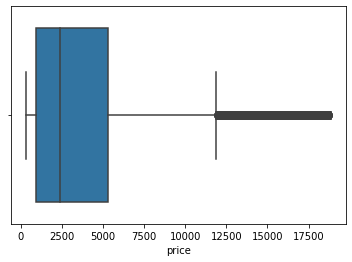

In [23]:
sns.boxplot(df_price); # görülen siyah noktalar aykırı verileri ifade eder

In [24]:
# eşik değer belirleme 
Q1=df_price.quantile(0.25) #quantile = yüzdelik dilim
Q3=df_price.quantile(0.75)
IQR=Q3-Q1 

In [25]:
Q1

950.0

In [26]:
Q3

5324.25

In [28]:
IQR # Q3 - Q1 değeri

4374.25

In [30]:
alt_sinir1=Q1-1.5*IQR # birinci çeyrek değerimizde 1.5* IQr kadar aşşağısını alt sınır olarak belirle demek, eşik değeri olarak belirleme (kutu grafiğinde soldaki düz çizgi)
üst_sinir1=Q3 + 1.5*IQR # üst sınırı oluşturduk

In [53]:
alt_sinir1 #alt sınırı belirledik

-5611.375

In [32]:
üst_sinir1 # üst sınırı belirledik

11885.625

In [33]:
aykırı_tf1=(df_price < alt_sinir1)

In [34]:
aykırı_tf1.head()

0    False
1    False
2    False
3    False
4    False
Name: price, dtype: bool

In [35]:
df_price[aykırı_tf1]

Series([], Name: price, dtype: int64)

In [36]:
aykırı_df_üst1=(df_price > üst_sinir1)

In [37]:
aykırı_df_üst1.head()

0    False
1    False
2    False
3    False
4    False
Name: price, dtype: bool

In [38]:
df_price[aykırı_df_üst1] # yakalanan aykırı gözlemler

23820    11886
23821    11886
23822    11888
23823    11888
23824    11888
         ...  
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, Length: 3540, dtype: int64

##### bir başka aykırı gözlem pratiği

In [76]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

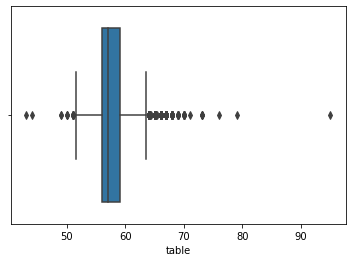

In [77]:
sns.boxplot(x=df_table);

In [6]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1

In [7]:
Q1

56.0

In [8]:
Q3

59.0

In [9]:
alt_sinir=Q1-1.5*IQR
üst_sinir=Q3 + 1.5*IQR

In [10]:
alt_sinir

51.5

In [11]:
üst_sinir

63.5

In [12]:
(df_table < alt_sinir) | (df_table > üst_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [79]:
aykırı_tf=(df_table < alt_sinir)

In [14]:
aykırı_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [15]:
df_table[aykırı_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [70]:
aykırı_tf_üst=(df_table > üst_sinir)

In [71]:
aykırı_tf_üst.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [72]:
df_table[aykırı_tf_üst]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [73]:
df_table[aykırı_tf_üst].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=589)

## aykırı gözlem silme işlemleri

In [20]:
df_table[aykırı_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [17]:
import pandas as pd

In [25]:
type(df_table)

pandas.core.series.Series

In [26]:
df_table=pd.DataFrame(df_table)

In [28]:
df_table

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [29]:
df_table.shape

(53940, 1)

In [47]:
df_tf=df_table[~((df_table < (alt_sinir)) | (df_table > (üst_sinir))).any(axis=1)]

In [48]:
df_tf.shape

(53335, 1)

In [56]:
type(df_price)

pandas.core.series.Series

In [57]:
df_price=pd.DataFrame(df_price)

In [58]:
df_price.shape

(53940, 1)

In [71]:
pr_df=df_price[~((df_price < (alt_sinir1)) | (df_price > (üst_sinir1))).any(axis=1)]

In [72]:
pr_df.shape

(50400, 1)

In [73]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64", "int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [83]:
df_table[aykırı_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [85]:
df_table.mean()

57.45718390804603

In [86]:
df_table[aykırı_tf]=df_table.mean()

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_table[aykırı_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [108]:
df_price[aykırı_df_üst1]

23820    11886
23821    11886
23822    11888
23823    11888
23824    11888
         ...  
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, Length: 3540, dtype: int64

In [112]:
df_price[aykırı_df_üst1] = df_price.mean()

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
df_price[aykırı_df_üst1]

23820    3932.799722
23821    3932.799722
23822    3932.799722
23823    3932.799722
23824    3932.799722
            ...     
27745    3932.799722
27746    3932.799722
27747    3932.799722
27748    3932.799722
27749    3932.799722
Name: price, Length: 3540, dtype: float64

In [122]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64", "int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [124]:
df_table=df["table"]

In [128]:
df_table[aykırı_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [129]:
alt_sinir

51.5

In [131]:
df_table[aykırı_tf]=alt_sinir

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
df_table[aykırı_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

# Çok Değişkenli Aykırı Gözlem Analizi
## Local Outlier Factor

* Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

* Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularının yoğunluğundan anlamlı bir şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [1]:
import seaborn as sns

diamonds=sns.load_dataset("diamonds")
diamonds=diamonds.select_dtypes(include=["float64","int64"])
df=diamonds.copy()
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [3]:
clf=LocalOutlierFactor(n_neighbors=20 , contamination=0.1)

In [5]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [6]:
df_scores=clf.negative_outlier_factor_

In [7]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [8]:
np.sort(df_scores)[:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [9]:
np.sort(df_scores)[13]

-3.823787967755565

In [10]:
esik_deger=np.sort(df_scores)[13]

In [11]:
aykırı_tf=df_scores > esik_deger

In [12]:
aykırı_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [26]:
### SİLME YÖNTEMİ

In [13]:
yeni_df=df[df_scores > esik_deger]

In [14]:
yeni_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [16]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [ ]:
### baskılama yöntemi

In [17]:
baski_deger=df[df_scores == esik_deger]

In [18]:
aykirilar=df[~aykırı_tf]

In [19]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [21]:
aykirilar.to_records(index=False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [20]:
ref=aykirilar.to_records(index=False)

In [25]:
ref[:]=baski_deger.to_records(index=False)

In [26]:
ref

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [33]:
import pandas as pd
df[~aykırı_tf]=pd.DataFrame(ref, index=df[~aykırı_tf].index)

In [34]:
df[~aykırı_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756.0,4.73,4.5,3.19
10377,0.45,68.6,57.0,756.0,4.73,4.5,3.19
24067,0.45,68.6,57.0,756.0,4.73,4.5,3.19
31230,0.45,68.6,57.0,756.0,4.73,4.5,3.19
35633,0.45,68.6,57.0,756.0,4.73,4.5,3.19
36503,0.45,68.6,57.0,756.0,4.73,4.5,3.19
38840,0.45,68.6,57.0,756.0,4.73,4.5,3.19
41918,0.45,68.6,57.0,756.0,4.73,4.5,3.19
45688,0.45,68.6,57.0,756.0,4.73,4.5,3.19
48410,0.45,68.6,57.0,756.0,4.73,4.5,3.19


# Eksik Veri Analizi

## Hızlı çözüm

In [1]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df=pd.DataFrame({"V1" : V1,
                 "V2" : V2,
                 "V3" : V3})

df


,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [4]:
df.isnull().sum() ## her bir değişkendeki eksik değer sayısını verir 

V1    2
V2    3
V3    2
dtype: int64

In [5]:
df.notnull().sum() ## her bir değişkeniin tam değer (boş olmayan) sayısını verir

V1    7
V2    6
V3    7
dtype: int64

In [7]:
df.isnull().sum().sum() ## değişkenin tüm boş değer sayılarını verir

7

In [8]:
df.isnull()  ## değişkenleri TF olarak getirir

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [10]:
df[df.isnull().any(axis=1)] ## en az bir boş değeri olan değişkenler getirir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [13]:
df[df.notnull().all(axis=1)] ## Tüm değerlerin yalnızca dolu olanlarını getir

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [14]:
# eksik değerleirn direkt silinmesi

In [6]:
df.dropna() ## boş değişkendeki satırı direkt siler

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [7]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [8]:
## Basit Değer Atama 

In [13]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [14]:
df["V1"].mean() ## ortalaması

6.0

In [17]:
df["V1"].fillna(df["V1"].mean()) ## boş değerlerin fiilna() yöntemiyle doldurulması

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

# Eksik Değerlerin Saptanması

In [2]:
# Değişkenlerdeki tam değer sayısı
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [3]:
# Değişkenlerdeki eksik değer sayısı
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [4]:
# Veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

7

In [5]:
# En az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [9]:
# Tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


# Eksik Veri Yapısının Güncelleştirilmesi

In [41]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df=pd.DataFrame({"V1" : V1,
                 "V2" : V2,
                 "V3" : V3})

df


,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [42]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [43]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [44]:
df.dropna(how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [45]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df=pd.DataFrame({"V1" : V1,
                 "V2" : V2,
                 "V3" : V3})

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [46]:
# Sayısal değişkenlerde atama

In [47]:
df["V1"].fillna(4)

0     1.0
1     3.0
2     6.0
3     4.0
4     7.0
5     1.0
6     4.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [48]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [49]:
# Tüm Değişkenler için birinci yol

In [50]:
df.apply(lambda x : x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [51]:
df["V3"].fillna(df["V3"].mean())

0    11.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6    11.0
7     2.0
8    31.0
Name: V3, dtype: float64

# Kategorik Değişken kırılımında Değer Atama

In [52]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])
df=pd.DataFrame({"maas" : V1,
                 "V2" : V2,
                 "V3" : V3,
                "departman": V4})

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [5]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [6]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [9]:
df.groupby("departman")["V2"].mean()

departman
IK    8.333333
IT    4.000000
Name: V2, dtype: float64

In [10]:
df["V2"].fillna(df.groupby("departman")["V2"].transform("mean"))

0     7.000000
1     4.000000
2     5.000000
3     8.000000
4    12.000000
5     8.333333
6     8.333333
7     2.000000
8     3.000000
Name: V2, dtype: float64

In [12]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)
df=pd.DataFrame({"maas" : V1,
                "departman": V4})

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [17]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [23]:
df["departman"].fillna(method=("bfill"))

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [24]:
df["departman"].fillna(method=("ffill"))

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

# Tahmine Dayalı Değer Atama Yöntemleri

In [28]:
import seaborn as sns
import missingno as msno

df=sns.load_dataset("titanic")
df=df.select_dtypes(include=["float64", "int64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [4]:
!pip install ycimpute

In [5]:
from ycimpute.imputer import knnimput

# Değişken Standardizasyonu (Veri Standardizasyonu)

In [5]:
import numpy as np
import pandas as pd 

In [53]:
V1=np.array([1,3,6,5,7])
V2=np.array([7,7,5,8,12])
V3=np.array([6,12,5,6,14])
df=pd.DataFrame({
               "V1":V1,
               "V2":V2,
               "V3":V3})
df=df.astype(float)
df

# standartlaştırmak veri setinni taşıdığı bilgiyi bozmadan belirli bir standarta getirir. Dönüştürme işlemi ise veri setinin taşımış olduğu bilgiyi bazen bozar bzen de temsil şeklini değiştirir.

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


## Standardizasyon

In [55]:
from sklearn import preprocessing

In [56]:
preprocessing.scale(df) # scale dönüştürmek demek

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

## Normalizasyon

In [9]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])